In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
df = pd.read_csv("C:\\Users\\Peter\Desktop\\Thinkful\\MedicalApp\\No-show-Issue-Comma-300k.csv", low_memory = False)

In [3]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [4]:
df['Status'].unique()

array(['Show-Up', 'No-Show'], dtype=object)

In [5]:
rel_data = df[['DayOfTheWeek','Status', 'Sms_Reminder']]

In [6]:
#Split the data into a dataframe with SMS reminders and a dataframe without SMS reminders
SMS_reminder = rel_data[rel_data['Sms_Reminder']==1]
no_SMS_reminder = rel_data[rel_data['Sms_Reminder']==0]

In [7]:
#Calculate the rate at which patients show up without an SMS reminder
no_SMS_reminder_counts = no_SMS_reminder['Status'].value_counts()
norm_noshw_rate=no_SMS_reminder_counts['No-Show']/(no_SMS_reminder_counts['Show-Up']+no_SMS_reminder_counts['No-Show'])

In [8]:
#Calculate the rate at which patients show up with an SMS reminder
SMS_reminder_counts = SMS_reminder['Status'].value_counts()
remind_noshw_rate=SMS_reminder_counts['No-Show']/(SMS_reminder_counts['Show-Up']+SMS_reminder_counts['No-Show'])

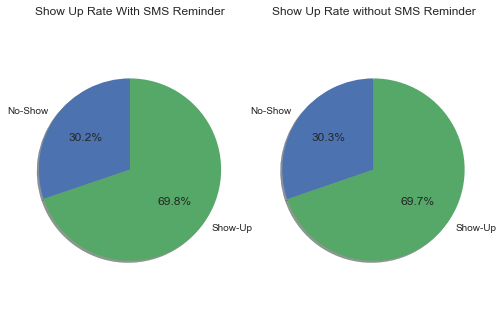

In [9]:
fig1, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title('Show Up Rate With SMS Reminder')
labels = 'No-Show', 'Show-Up'
sizes = [remind_noshw_rate, 1-remind_noshw_rate]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

ax2.set_title('Show Up Rate without SMS Reminder')
sizes = [norm_noshw_rate, 1-norm_noshw_rate]
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal') 

plt.show()

plt.show()


In [10]:
Mon_Data = rel_data[rel_data['DayOfTheWeek']=='Monday']
Tue_Data = rel_data[rel_data['DayOfTheWeek']=='Tuesday']
Wed_Data = rel_data[rel_data['DayOfTheWeek']=='Wednesday']
Thu_Data = rel_data[rel_data['DayOfTheWeek']=='Thursday']
Fri_Data = rel_data[rel_data['DayOfTheWeek']=='Friday']
Sat_Data = rel_data[rel_data['DayOfTheWeek']=='Saturday']
Sun_Data = rel_data[rel_data['DayOfTheWeek']=='Sunday']

In [11]:
#Calculate the rate at which patients show up without an SMS reminder
Mon_att_rate = Mon_Data['Status'].value_counts()
norm_noshw_rate_Mon=Mon_att_rate['No-Show']/(Mon_att_rate['Show-Up']+Mon_att_rate['No-Show'])

Tue_att_rate = Tue_Data['Status'].value_counts()
norm_noshw_rate_Tue=Tue_att_rate['No-Show']/(Tue_att_rate['Show-Up']+Tue_att_rate['No-Show'])

Wed_att_rate = Wed_Data['Status'].value_counts()
norm_noshw_rate_Wed=Wed_att_rate['No-Show']/(Wed_att_rate['Show-Up']+Wed_att_rate['No-Show'])

Thu_att_rate = Thu_Data['Status'].value_counts()
norm_noshw_rate_Thu=Thu_att_rate['No-Show']/(Thu_att_rate['Show-Up']+Thu_att_rate['No-Show'])

Fri_att_rate = Fri_Data['Status'].value_counts()
norm_noshw_rate_Fri=Fri_att_rate['No-Show']/(Fri_att_rate['Show-Up']+Fri_att_rate['No-Show'])

Sat_att_rate = Sat_Data['Status'].value_counts()
norm_noshw_rate_Sat=Sat_att_rate['No-Show']/(Sat_att_rate['Show-Up']+Sat_att_rate['No-Show'])

Sun_att_rate = Sun_Data['Status'].value_counts()
norm_noshw_rate_Sun=Sun_att_rate['No-Show']/(Sun_att_rate['Show-Up']+Sun_att_rate['No-Show'])

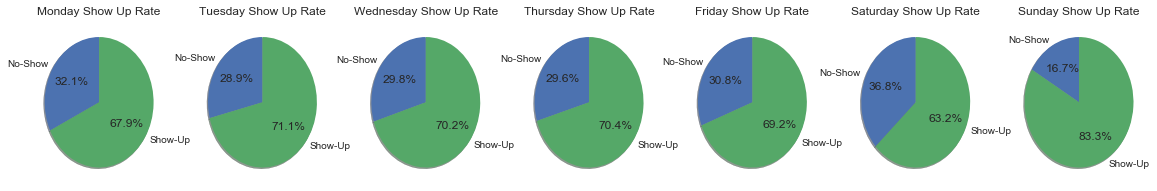

In [13]:
fig1, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, figsize=(20, 3))

ax1.set_title('Monday Show Up Rate')
labels = 'No-Show', 'Show-Up'
sizes = [norm_noshw_rate_Mon, 1-norm_noshw_rate_Mon]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax2.set_title('Tuesday Show Up Rate')
labels = 'No-Show', 'Show-Up'
sizes = [norm_noshw_rate_Tue, 1-norm_noshw_rate_Tue]
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax3.set_title('Wednesday Show Up Rate')
labels = 'No-Show', 'Show-Up'
sizes = [norm_noshw_rate_Wed, 1-norm_noshw_rate_Wed]
ax3.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax4.set_title('Thursday Show Up Rate')
labels = 'No-Show', 'Show-Up'
sizes = [norm_noshw_rate_Thu, 1-norm_noshw_rate_Thu]
ax4.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax5.set_title('Friday Show Up Rate')
labels = 'No-Show', 'Show-Up'
sizes = [norm_noshw_rate_Fri, 1-norm_noshw_rate_Fri]
ax5.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax6.set_title('Saturday Show Up Rate')
labels = 'No-Show', 'Show-Up'
sizes = [norm_noshw_rate_Sat, 1-norm_noshw_rate_Sat]
ax6.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax7.set_title('Sunday Show Up Rate')
labels = 'No-Show', 'Show-Up'
sizes = [norm_noshw_rate_Sun, 1-norm_noshw_rate_Sun]
ax7.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

<h1>Conclusion from the Data</h1>

It seems that the SMS reminder has no effect on whether or not patients show up as the no show rate for patients who recieved and didn't recieve reminders is the same.  

This causes an obvious problem where the medical professionals are left dealing with the time constraint consequences of no show patients.  

A potential solution to this problem would be to allow patients to cancel their appointments via text, as it seems patients who don't intended on going to their appointments have decided this prior or regardless of the text reminder.

To test this we could split the patients up into two groups randomly.  One group recieves a text reminding them of their appointment but also allowing them to cancel their appointment by responding with a SMS message saying 'cancel'.  The other group will recieve no information whatsoever, because existing data shows SMS reminders have no effect on attendance of appointments.  This test will need do be carried out for at least a week as the show up rate varies over the course of a week.

If the group that is given the chance to canel their appointment sees a decrease in no shows for uncanceled appointments then we can conclude that the effects of this test are positive.  